In [2]:

## A. 루리웹 핫딜게시판 스크래핑 해보기

from urllib.request import urlopen
from bs4 import BeautifulSoup

# 여러 페이지 긁어오기
def crawling_ruliweb(max_page = 5):
    data = []
    page = 0
    base_link = "https://bbs.ruliweb.com/market/board/1020"
    while(1):
        page += 1
        if page >max_page: break
        link = base_link + "?page=" + str(page)
        get_page(link , data)

    return data
# 한페이지 
def get_page(link , data):
    
    html = urlopen(link)
    bsObject = BeautifulSoup(html, "html.parser")
    total = bsObject.select("tr.table_body")
        
    for i,cover in enumerate(total):
        if i < 8: continue
        try:
            write_name = cover.select("a.deco")[0].get_text()
            html_link = str(cover.select("a.deco")[0].get("href"))
            write_number = cover.select("td.id")[0].get_text().strip()
            category = cover.select("td.divsn")[0].get_text().strip()
            write_time = cover.select("td.time")[0].get_text().strip()
            num_reply = int(cover.select("a.num_reply>span")[0].get_text().strip())
            num_rec = int(cover.select("td.recomd")[0].get_text().strip())
            num_hit = int(cover.select("td.hit")[0].get_text().strip())
            data.append([write_name , write_number , category , write_time , num_reply , num_rec , num_hit , html_link])
#             print("작성넘버 : " , cover.select("td.id")[0].get_text().strip())
#             print("카테고리 : " , cover.select("td.divsn")[0].get_text().strip())
#             print("작성 시간 : ", cover.select("td.time")[0].get_text().strip())
#             print("댓글 : " , cover.select("a.num_reply>span")[0].get_text().strip())
#             print("추천수 : " , cover.select("td.recomd")[0].get_text().strip())
#             print("조회수 : " , cover.select("td.hit")[0].get_text().strip())
#             print("")
        except: continue
 

In [3]:
## A 테스트

# 핫딜유저게시판 최근 5페이즈 스크래핑
data = crawling_ruliweb(5)
import pandas as pd
df = pd.DataFrame(data , columns= ["제목", "작성넘버", "카테고리" , "작성시간" , "댓글" , "추천수" , "조회수" , "링크"])

def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val,val)

df.style.format({"링크" : make_clickable})

,제목,작성넘버,카테고리,작성시간,댓글,추천수,조회수,링크
0,[버거킹] 통새우 와퍼주니어 2개 5000원 (1/11~24),47210,음식,09:01,8,3,2366,https://bbs.ruliweb.com/market/board/1020/read/47210?page=1
1,"[맥도날드앱] 더블불고기버거 2600원, 스낵랩 1200원 외 (1/11...",47209,음식,04:03,4,7,4453,https://bbs.ruliweb.com/market/board/1020/read/47209?page=1
2,"[11번가] 코카콜라 제로 355ml 24캔 x 2박스 26,960원",47207,음식,01:20,44,14,16061,https://bbs.ruliweb.com/market/board/1020/read/47207?page=1
3,"[11번가] 뚜레쥬르 최대 22%할인 (케잌,교환권)",47206,음식,00:13,2,2,4658,https://bbs.ruliweb.com/market/board/1020/read/47206?page=1
4,[11번가] 버거킹 최대 46% 할인 (1/11~13),47205,음식,00:10,15,3,9800,https://bbs.ruliweb.com/market/board/1020/read/47205?page=1
5,[11번가] KFC 최대 45% 할인 (1/11~17),47204,음식,00:03,19,8,10489,https://bbs.ruliweb.com/market/board/1020/read/47204?page=1
6,[전자랜드] (품절)플스5 리모컨 38800,47203,게임H/W,2021.01.10,30,1,19715,https://bbs.ruliweb.com/market/board/1020/read/47203?page=1
7,[위메프] 국내산 덴탈마스크 50매 3500원,47202,생활용품,2021.01.10,17,2,11598,https://bbs.ruliweb.com/market/board/1020/read/47202?page=1
8,[소프라노몰] 여울이 아미보 1만원,47200,게임S/W,2021.01.10,22,13,32037,https://bbs.ruliweb.com/market/board/1020/read/47200?page=1
9,"[카카오] 복음자리 딸기청 580g 한병 9,900원 / 무배",47199,음식,2021.01.10,36,15,23503,https://bbs.ruliweb.com/market/board/1020/read/47199?page=1


In [5]:
df.describe()

,댓글,추천수,조회수
count,135.000000,135.000000,135.000000
mean,36.081481,13.222222,26041.755556
std,31.532275,23.034260,18599.619962
min,2.000000,1.000000,2366.000000
25%,15.000000,5.000000,15847.500000
50%,24.000000,8.000000,19673.000000
75%,47.000000,14.000000,28211.500000
max,139.000000,192.000000,89129.000000


In [6]:
cond = df["카테고리"] == "음식"
df[cond]

,제목,작성넘버,카테고리,작성시간,댓글,추천수,조회수,링크
0,"[맥도날드앱] 더블불고기버거 2600원, 스낵랩 1200원 외 (1/11...",47209,음식,04:03,2,5,3126,https://bbs.ruliweb.com/market/board/1020/read...
1,"[11번가] 코카콜라 제로 355ml 24캔 x 2박스 26,960원",47207,음식,01:20,33,13,12352,https://bbs.ruliweb.com/market/board/1020/read...
2,"[11번가] 뚜레쥬르 최대 22%할인 (케잌,교환권)",47206,음식,00:13,2,2,4102,https://bbs.ruliweb.com/market/board/1020/read...
3,[11번가] 버거킹 최대 46% 할인 (1/11~13),47205,음식,00:10,14,3,8758,https://bbs.ruliweb.com/market/board/1020/read...
4,[11번가] KFC 최대 45% 할인 (1/11~17),47204,음식,00:03,18,7,8523,https://bbs.ruliweb.com/market/board/1020/read...
8,"[카카오] 복음자리 딸기청 580g 한병 9,900원 / 무배",47199,음식,2021.01.10,36,15,22850,https://bbs.ruliweb.com/market/board/1020/read...
9,[머지포인트]토스 결제시 최대 16500원 캐시백 이벤트 (~1/18),47197,음식,2021.01.10,28,8,17815,https://bbs.ruliweb.com/market/board/1020/read...
13,"[G마켓]환타 오렌지 190 ml 60 캔 (19,900/무료)",47189,음식,2021.01.09,18,10,19600,https://bbs.ruliweb.com/market/board/1020/read...
14,[롯데리아] 티렉스 버거 2900원 (~1/13),47188,음식,2021.01.09,50,26,38997,https://bbs.ruliweb.com/market/board/1020/read...
15,"[11st] 코카콜라 제로콜라 300ml PET 24개+보냉백 17,01...",47184,음식,2021.01.09,36,13,35601,https://bbs.ruliweb.com/market/board/1020/read...


In [9]:
df.to_excel("./sample.xlsx")

In [31]:
# -*- coding: utf-8 -*-
df_reco = df.pivot_table(values = "추천수" , index = "카테고리" , aggfunc= "sum")
import matplotlib.pyplot as plt
df_reco.index.values


df_hit = df.pivot_table(values = "조회수" , index = "카테고리" , aggfunc= "sum")
df_hit

,조회수
카테고리,
A/V,138989
PC/가전,464106
게임H/W,463556
게임S/W,1243409
상품권,180792
생활용품,104235
음식,812135
의류,30578
취미용품,122605


C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A

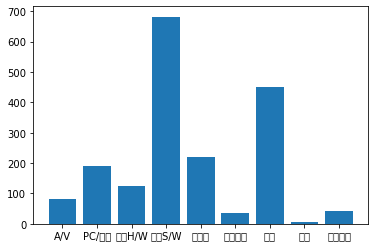

<BarContainer object of 9 artists>

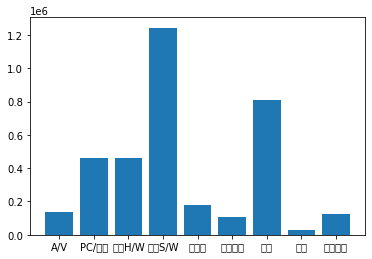

In [29]:
plt.bar(df_reco.index.values , df_reco["추천수"].values)
plt.show()
plt.bar(df_hit.index.values , df_hit["조회수"].values)

In [32]:
df["카테고리"].unique()

array(['음식', '게임H/W', '생활용품', '게임S/W', 'PC/가전', '취미용품', 'A/V', '의류',
       '상품권'], dtype=object)

In [54]:
link = "https://bbs.ruliweb.com/market/board/1020"
html = urlopen(link)
bsObject = BeautifulSoup(html, "html.parser")
total = bsObject.select("tr.table_body")

for i,cover in enumerate(total):

    write_name = cover.select("a.deco")[0].get_text()
    html_link = str(cover.select("a.deco")[0].get("href"))
    print(html_link)
    break
    
df = pd.DataFrame([html_link] , columns= ["url"])
df['url']

https://bbs.ruliweb.com/market/board/1020/read/47106?


0    https://bbs.ruliweb.com/market/board/1020/read...
Name: url, dtype: object

In [55]:
def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val,val)

df.style.format(make_clickable)

,url
0,https://bbs.ruliweb.com/market/board/1020/read/47106?


In [7]:
import numpy as np
a = np.array([1,4,5,1])
b =  [1,2,3,4,5]
print(sum(a))
print(sum(b))

11
15


In [10]:
c = [1,2,3,4,5]
c.insert(100)
c

TypeError: insert() takes exactly 2 arguments (1 given)

In [13]:
a = (1,2,3,4)
a = a*2
a[2] = 9
a

TypeError: 'tuple' object does not support item assignment